# Dataset EDA and some API experimentation

In [140]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import plotly.express as px
import datetime

#### Adding the datasets into the notebook. When replicating, make sure to check your path

In [ ]:
#multiple price cycles
btcusd=pd.read_csv('data/btcusd.csv')
ethusd=pd.read_csv('data/ethusd.csv')
xrpusd=pd.read_csv('data/xrpusd.csv')

#singular price cycles
adausd=pd.read_csv('data/adausd.csv')
solusd=pd.read_csv('data/solusd.csv')

#### Using BTCUSD as the example 

In [ ]:
eth.head()

#### Changing the time to proper format and setting as index 

In [ ]:
def change_date(df):
    df['time']= pd.to_datetime(df['time'],unit = 'ms') #ms changes unix time to y/m/d hour:minute:second
    df = df.set_index('time',drop = True) #sets index of df to be the time column
    df.sort_index #sorts by dateindex
    return df

# the function that converts "time column and set it as index"

In [ ]:
btc = change_date(btcusd)
eth = change_date(ethusd)
xrp = change_date(xrpusd)
ada = change_date(adausd)
sol = change_date(solusd)

In [64]:
btc.head()

,open,close,high,low,volume
time,,,,,
2013-04-01 00:07:00,93.25,93.30,93.30,93.25,93.300000
2013-04-01 00:08:00,100.00,100.00,100.00,100.00,93.300000
2013-04-01 00:09:00,93.30,93.30,93.30,93.30,33.676862
2013-04-01 00:11:00,93.35,93.47,93.47,93.35,20.000000
2013-04-01 00:12:00,93.47,93.47,93.47,93.47,2.021627


In [ ]:
eth.head()

In [ ]:
xrp.head()

In [ ]:
ada.head()

In [ ]:
sol.head()

#### Basic Visualization
 - No na values
 - We should get fuller set of data for SOL
 - An API might be the best move here

In [ ]:
#btc.isna().sum()
#eth.isna().sum()
#xrp.isna().sum()
#ada.isna().sum()
#sol.isna().sum()

Text(0.5, 1.0, 'SOL')

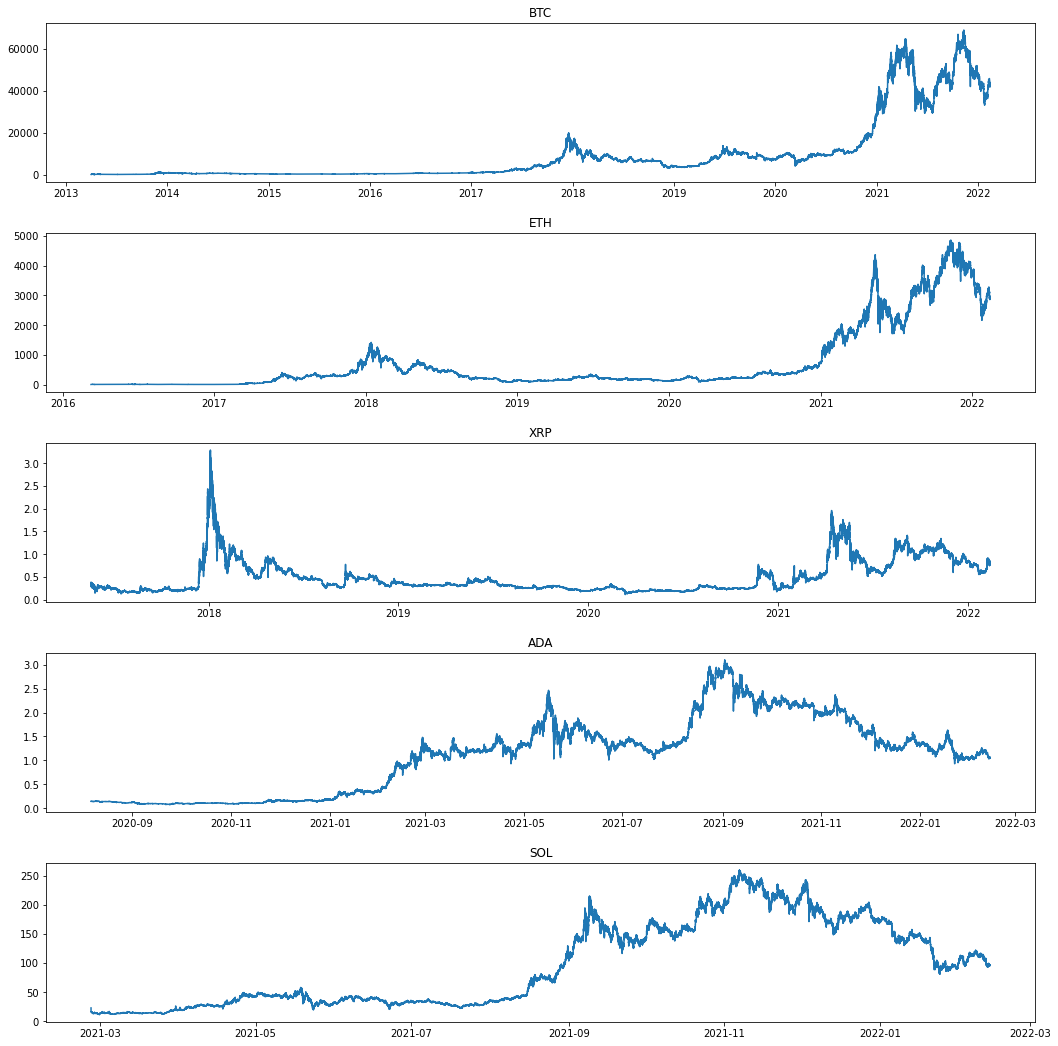

In [44]:
fig, ax = plt.subplots(5,figsize=(15,15))
fig.tight_layout(pad = 3.0)

ax[0].plot(btc.index, btc['close'])
ax[0].set_title('BTC')

ax[1].plot(eth.index, eth['close'])
ax[1].set_title('ETH')

ax[2].plot(xrp.index, xrp['close'])
ax[2].set_title('XRP')

ax[3].plot(ada.index, ada['close'])
ax[3].set_title('ADA')

ax[4].plot(sol.index, sol['close'])
ax[4].set_title('SOL')

#### Summary statistics

In [77]:
#BTC
btc.describe()

,open,close,high,low,volume
count,3.731662e+06,3.731662e+06,3.731662e+06,3.731662e+06,3.731662e+06
mean,1.161240e+04,1.161243e+04,1.161850e+04,1.160632e+04,1.608353e+01
std,1.621576e+04,1.621581e+04,1.622433e+04,1.620722e+04,5.606684e+01
min,1.000000e-02,1.060000e+00,1.060000e+00,1.000000e-02,1.000000e-08
25%,6.702000e+02,6.701900e+02,6.707000e+02,6.700000e+02,5.099000e-01
50%,6.461400e+03,6.461400e+03,6.462980e+03,6.460000e+03,2.726970e+00
75%,1.063612e+04,1.063600e+04,1.064200e+04,1.063100e+04,1.166179e+01
max,6.892500e+04,6.892500e+04,6.895800e+04,6.873400e+04,7.228079e+03


In [63]:
btc.loc[btc['open'] == 0.01]

,open,close,high,low,volume
time,,,,,
2013-04-16 04:38:00,0.01,59.991,59.991,0.01,35.734455


BTC has an 'open' low of 0.01 which occurs exactly April 16 2013

For further study, I looked into the first year of available BTC data. It seems to have random drops which probably come from the data source. I suggest subsetting or finding a different data source

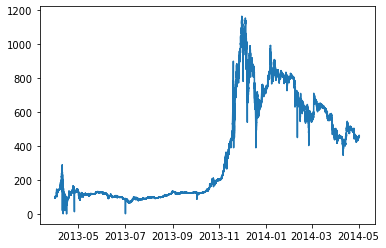

In [75]:
plt.plot(btc.loc['April 1 2013' : 'May 1 2014'].index,btc.loc['April 1 2013' : 'May 1 2014']['open'])

In [76]:
#ETH
eth.describe()

,open,close,high,low,volume
count,2.514542e+06,2.514542e+06,2.514542e+06,2.514542e+06,2.514542e+06
mean,8.808723e+02,8.808826e+02,8.814569e+02,8.802930e+02,1.247897e+02
std,1.168458e+03,1.168484e+03,1.169167e+03,1.167779e+03,4.607442e+02
min,5.890100e+00,5.861000e+00,5.890100e+00,5.861000e+00,1.000000e-08
25%,1.834700e+02,1.834700e+02,1.835400e+02,1.833900e+02,4.666122e+00
50%,3.076500e+02,3.076500e+02,3.078800e+02,3.074600e+02,2.337000e+01
75%,9.184600e+02,9.184775e+02,9.194925e+02,9.173375e+02,9.432207e+01
max,4.863222e+03,4.863222e+03,4.864900e+03,4.859400e+03,6.107060e+04


In [78]:
#XRP
xrp.describe()

,open,close,high,low,volume
count,2.170418e+06,2.170418e+06,2.170418e+06,2.170418e+06,2.170418e+06
mean,5.257454e-01,5.257441e-01,5.263009e-01,5.251728e-01,3.266550e+04
std,3.797746e-01,3.797751e-01,3.804866e-01,3.790415e-01,1.114041e+05
min,1.128800e-01,1.125500e-01,1.133100e-01,1.100400e-01,1.000000e-08
25%,2.569100e-01,2.569100e-01,2.570100e-01,2.567500e-01,8.482804e+02
50%,3.718900e-01,3.719000e-01,3.721600e-01,3.715800e-01,4.900000e+03
75%,6.812075e-01,6.811900e-01,6.818500e-01,6.805500e-01,2.240535e+04
max,3.290000e+00,3.290300e+00,3.300000e+00,3.284000e+00,1.120038e+07


In [80]:
#SOL
sol.describe()

,open,close,high,low,volume,Unnamed: 0
count,333532.000000,333532.000000,333532.000000,333532.000000,3.335320e+05,0.0
mean,113.893868,113.895578,113.973177,113.815273,1.733002e+02,NaN
std,71.285929,71.287148,71.330781,71.241475,7.555373e+02,NaN
min,11.556000,11.556000,11.556000,11.556000,1.000000e-08,NaN
25%,38.776000,38.774000,38.796000,38.745000,2.500000e+00,NaN
50%,117.530000,117.510000,117.590000,117.445000,1.955248e+01,NaN
75%,174.370000,174.380000,174.480000,174.260000,1.028416e+02,NaN
max,259.800000,259.800000,259.800000,259.590000,1.148083e+05,NaN


In [81]:
#ADA
ada.describe()

,open,close,high,low,volume,Unnamed: 0
count,443384.000000,443384.000000,443384.000000,443384.000000,4.433840e+05,26844.000000
mean,1.364939,1.364924,1.365729,1.364110,6.858573e+03,13421.500000
std,0.705987,0.705983,0.706315,0.705642,3.115937e+04,7749.339649
min,0.075785,0.075780,0.075786,0.075780,1.000000e-08,0.000000
25%,1.064500,1.064500,1.065200,1.063800,1.278914e+02,6710.750000
50%,1.320800,1.320800,1.321500,1.320000,9.094477e+02,13421.500000
75%,1.878700,1.878800,1.879700,1.877725,3.753502e+03,20132.250000
max,3.098900,3.099000,3.099000,3.094000,4.772661e+06,26843.000000


#### Returns over time

Using formula ROI = (Ending value / Starting value) * 100 - 100

Time Frames: 1D, 1W, 1M, 1Y, 5Y (or furthest back)

In [150]:
#potential to write a function to gather the 1d,1w values etc

cols = ['1D', '1W', '1M', '1Y', 'Max']
rows = ['BTC', 'ETH', 'XRP', 'SOL', 'ADA']
ROI_df = pd.DataFrame(index = rows, columns = cols)
ROI_df

,1D,1W,1M,1Y,Max
BTC,NaN,NaN,NaN,NaN,NaN
ETH,NaN,NaN,NaN,NaN,NaN
XRP,NaN,NaN,NaN,NaN,NaN
SOL,NaN,NaN,NaN,NaN,NaN
ADA,NaN,NaN,NaN,NaN,NaN


In [124]:
def ROI(end, start):
    return (end / start)*100 - 100

In [152]:
#1D
ebtc = btc.tail(2).iloc[1,1:2] #ending value
sbtc = btc.tail(2).iloc[0,1:2] #starting value

#ROI(ebtc[0],sbtc[0])

eeth = eth.tail(2).iloc[1,1:2] #ending value
seth = eth.tail(2).iloc[0,1:2] #starting value

#ROI(eeth[0],seth[0])

exrp = xrp.tail(2).iloc[1,1:2] #ending value
sxrp = xrp.tail(2).iloc[0,1:2] #starting value

#ROI(exrp[0],sxrp[0])

esol = sol.tail(2).iloc[1,1:2] #ending value
ssol = sol.tail(2).iloc[0,1:2] #starting value

#ROI(esol[0],ssol[0])

eada = ada.tail(2).iloc[1,1:2] #ending value
sada = ada.tail(2).iloc[0,1:2] #starting value

#ROI(eada[0],sada[0])

ROI_df['1D'] = [ROI(ebtc[0],sbtc[0]), ROI(eeth[0],seth[0]), ROI(exrp[0],sxrp[0]), ROI(esol[0],ssol[0]),ROI(eada[0],sada[0])]
ROI_df

,1D,1W,1M,1Y,Max
BTC,0.004777,NaN,NaN,NaN,NaN
ETH,0.003428,NaN,NaN,NaN,NaN
XRP,0.108536,NaN,NaN,NaN,NaN
SOL,0.073779,NaN,NaN,NaN,NaN
ADA,0.094670,NaN,NaN,NaN,NaN


In [173]:
#1W
ebtc = btc.tail(2).iloc[1,1:2] #ending value
sbtc = btc.loc[btc.tail(1).index- datetime.timedelta(days=7)].iloc[0,1:2] #starting value

eeth = eth.tail(2).iloc[1,1:2] #ending value
seth = eth.loc[eth.tail(1).index- datetime.timedelta(days=7)].iloc[0,1:2] #starting value

exrp = xrp.tail(2).iloc[1,1:2] #ending value
sxrp = xrp.loc[xrp.tail(1).index- datetime.timedelta(days=7)].iloc[0,1:2] #starting value

esol = sol.tail(2).iloc[1,1:2] #ending value
ssol = sol.loc[sol.tail(1).index- datetime.timedelta(days=7, minutes = 2)].iloc[0,1:2] #starting value
#sol did not have any values for 8:12 1 week ago so i messed with it by 2 minutes. Shouldn't change much
#Another reason for API?

eada = ada.tail(2).iloc[1,1:2] #ending value
sada = ada.loc[ada.tail(1).index- datetime.timedelta(days=7)].iloc[0,1:2] #starting value

ROI_df['1W'] = [ROI(ebtc[0],sbtc[0]), ROI(eeth[0],seth[0]), ROI(exrp[0],sxrp[0]), ROI(esol[0],ssol[0]),ROI(eada[0],sada[0])]
ROI_df

,1D,1W,1M,1Y,Max
BTC,0.004777,1.771421,NaN,NaN,NaN
ETH,0.003428,-3.024763,NaN,NaN,NaN
XRP,0.108536,23.824582,NaN,NaN,NaN
SOL,0.073779,-15.921076,NaN,NaN,NaN
ADA,0.094670,-6.466737,NaN,NaN,NaN


In [174]:
#1M
ebtc = btc.tail(2).iloc[1,1:2] #ending value
sbtc = btc.loc[btc.tail(1).index- datetime.timedelta(days=31)].iloc[0,1:2] #starting value

eeth = eth.tail(2).iloc[1,1:2] #ending value
seth = eth.loc[eth.tail(1).index- datetime.timedelta(days=31)].iloc[0,1:2] #starting value

exrp = xrp.tail(2).iloc[1,1:2] #ending value
sxrp = xrp.loc[xrp.tail(1).index- datetime.timedelta(days=31)].iloc[0,1:2] #starting value

esol = sol.tail(2).iloc[1,1:2] #ending value
ssol = sol.loc[sol.tail(1).index- datetime.timedelta(days=31, minutes = 2)].iloc[0,1:2] #starting value
#sol did not have any values for 8:12 1 week ago so i messed with it by 2 minutes. Shouldn't change much
#Another reason for API?

eada = ada.tail(2).iloc[1,1:2] #ending value
sada = ada.loc[ada.tail(1).index- datetime.timedelta(days=31)].iloc[0,1:2] #starting value

ROI_df['1M'] = [ROI(ebtc[0],sbtc[0]), ROI(eeth[0],seth[0]), ROI(exrp[0],sxrp[0]), ROI(esol[0],ssol[0]),ROI(eada[0],sada[0])]
ROI_df

,1D,1W,1M,1Y,Max
BTC,0.004777,1.771421,-3.193568,NaN,NaN
ETH,0.003428,-3.024763,-12.876639,NaN,NaN
XRP,0.108536,23.824582,4.650606,NaN,NaN
SOL,0.073779,-15.921076,-36.637937,NaN,NaN
ADA,0.094670,-6.466737,-18.311056,NaN,NaN


In [187]:
#1Y
ebtc = btc.tail(2).iloc[1,1:2] #ending value
sbtc = btc.loc[btc.tail(1).index- datetime.timedelta(days=365)].iloc[0,1:2] #starting value

eeth = eth.tail(2).iloc[1,1:2] #ending value
seth = eth.loc[eth.tail(1).index- datetime.timedelta(days=365)].iloc[0,1:2] #starting value

exrp = xrp.tail(2).iloc[1,1:2] #ending value
sxrp = xrp.loc[xrp.tail(1).index- datetime.timedelta(days=365)].iloc[0,1:2] #starting value

esol = sol.tail(2).iloc[1,1:2] #ending value
ssol = sol.head(2).iloc[0,1:2] #starting value
#sol starts at 2/25 so 1Y and the Max will be the same
#Another reason for API?

eada = ada.tail(2).iloc[1,1:2] #ending value
sada = ada.loc[ada.tail(1).index- datetime.timedelta(days=365, minutes = 2)].iloc[0,1:2] #starting value

ROI_df['1Y'] = [ROI(ebtc[0],sbtc[0]), ROI(eeth[0],seth[0]), ROI(exrp[0],sxrp[0]), ROI(esol[0],ssol[0]),ROI(eada[0],sada[0])]
ROI_df

,1D,1W,1M,1Y,Max
BTC,0.004777,1.771421,-3.193568,-10.283859,NaN
ETH,0.003428,-3.024763,-12.876639,60.452071,NaN
XRP,0.108536,23.824582,4.650606,38.544987,NaN
SOL,0.073779,-15.921076,-36.637937,318.713043,NaN
ADA,0.094670,-6.466737,-18.311056,15.584756,NaN


In [188]:
#Max
ebtc = btc.tail(2).iloc[1,1:2] #ending value
sbtc = btc.head(2).iloc[0,1:2] #starting value

eeth = eth.tail(2).iloc[1,1:2] #ending value
seth = eth.head(2).iloc[0,1:2] #starting value

exrp = xrp.tail(2).iloc[1,1:2] #ending value
sxrp = xrp.head(2).iloc[0,1:2] #starting value

esol = sol.tail(2).iloc[1,1:2] #ending value
ssol = sol.head(2).iloc[0,1:2] #ending value

eada = ada.tail(2).iloc[1,1:2] #ending value
sada = ada.head(2).iloc[0,1:2] #starting value

ROI_df['Max'] = [ROI(ebtc[0],sbtc[0]), ROI(eeth[0],seth[0]), ROI(exrp[0],sxrp[0]), ROI(esol[0],ssol[0]),ROI(eada[0],sada[0])]
ROI_df

,1D,1W,1M,1Y,Max
BTC,0.004777,1.771421,-3.193568,-10.283859,45352.331974
ETH,0.003428,-3.024763,-12.876639,60.452071,28794.721204
XRP,0.108536,23.824582,4.650606,38.544987,118.458380
SOL,0.073779,-15.921076,-36.637937,318.713043,318.713043
ADA,0.094670,-6.466737,-18.311056,15.584756,640.925018


# API experimentation

This is an example of coinapi.io. Has good reviews and we are able to get up to 6000 days worth of data without paying and it should be live updated. We can also choose different time frames. Seems like a pretty good option [LINK]('https://docs.coinapi.io/#timeseries-periods-get')

In [190]:
import requests

In [203]:
url = 'https://rest.coinapi.io/v1/exchangerate/BTC/USD/history?period_id=10DAY&time_start=2016-01-01T00:00:00&time_end=2016-02-01T00:00:00'
headers = {'X-CoinAPI-Key' : 'CB9BB530-AA36-4C4A-838F-53BBAEC4EFB4'}
response = requests.get(url, headers=headers)

In [204]:
print(response.text)

[
  {
    "time_period_start": "2015-12-31T00:00:00.0000000Z",
    "time_period_end": "2016-01-10T00:00:00.0000000Z",
    "time_open": "2015-12-31T00:01:00.0000000Z",
    "time_close": "2016-01-09T23:59:00.0000000Z",
    "rate_open": 426.4783795235668,
    "rate_high": 464.65231327900057,
    "rate_low": 419.6286759529717,
    "rate_close": 449.67700571409875
  },
  {
    "time_period_start": "2016-01-10T00:00:00.0000000Z",
    "time_period_end": "2016-01-20T00:00:00.0000000Z",
    "time_open": "2016-01-10T00:01:00.0000000Z",
    "time_close": "2016-01-19T23:59:00.0000000Z",
    "rate_open": 449.8243878335649,
    "rate_high": 451.8418870338542,
    "rate_low": 352.30390711348906,
    "rate_close": 376.01384654885527
  },
  {
    "time_period_start": "2016-01-20T00:00:00.0000000Z",
    "time_period_end": "2016-01-30T00:00:00.0000000Z",
    "time_open": "2016-01-20T00:01:00.0000000Z",
    "time_close": "2016-01-29T23:59:00.0000000Z",
    "rate_open": 376.05757271151793,
    "rate_high":